In [1]:
from __future__ import annotations
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

def plot(height, width, robots, walls):
    fig, ax = plt.subplots()
    
    # plot robots
    for robot in robots.values():
        ax.scatter(robot.get_x() + 0.5, robot.get_y() + 0.5, c=robot.get_color())
    
    # plot walls
    for wall in walls:
        coord_start = [wall.get_x(), wall.get_x() + int(wall.is_horizontal())]
        coord_end = [wall.get_y(), wall.get_y() + int(wall.is_vertical())]
        ax.plot(coord_start, coord_end, c="black")
    
    # hide tick labels and dashes
    ax.set(xlim=(0, width), xticks=np.arange(1, width), xticklabels=[],
           ylim=(0, height), yticks=np.arange(1, height), yticklabels=[])
    ax.tick_params(axis='y', colors='white')
    ax.tick_params(axis='x', colors='white')
    
    # show grid
    ax.grid(True)
    
    plt.show()

In [2]:
class RobotColors:
    RED="red"
    GREEN="green"
    YELLOW="orange"
    BLUE="blue"

class Directions:
    UP="UP"
    DOWN="DOWN"
    LEFT="LEFT"
    RIGHT="RIGHT"
    
class Coord():
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        
    def __eq__(self, other) -> bool:
        return self.x == other.x and self.y == other.y

    def __ne__(self, other) -> bool:
        return not self.__eq__(other)
    
    def __add__(self, other) -> Coord:
        return Coord(self.x + other.x, self.y + other.y)
    
    def get_x(self) -> int:
        return self.x
    
    def get_y(self) -> int:
        return self.y
    
    def __str__(self) -> str:
        return "({},{})".format(self.get_x(), self.get_y())
    

class Wall():
    def __init__(self, x=0, y=0, ori=0):
        self._coord = Coord(x,y)
        self._orientation = ori # 0 means horizontal and 1 vertical

    def __eq__ (self, other):
        return self.get_coord() == other.get_coord() and self.get_orientation() == other.get_orientation()

    def __ne__ (self, other):
        return not self.__eq__(other)
    
    def is_horizontal(self) -> bool:
        return self.get_orientation() == 0
    
    def is_vertical(self) -> bool:
        return not self.is_horizontal()
    
    def is_coord_equal(self, other) -> bool:
        return self.coord == other.coord
    
    def get_x(self) -> int:
        return self.get_coord().get_x()
    
    def get_y(self) -> int:
        return self.get_coord().get_y()
    
    def get_coord(self) -> Coord:
        return self._coord

    def add_coord(self, coord: Coord):
        self._coord += coord
        return    
    
    def get_orientation(self) -> bin:
        return self._orientation
    
    def __str__(self):
        return "Wall coordinates: {}, orientation: {}".format(self.coord.__str__(), self.orientation)

    
class Robot():
    def __init__(self, x: int = 0, y: int = 0, color: RobotColors = None):
        self._coord = Coord(x,y)
        self._color = color

    def __eq__ (self, other) -> bool:
        return self.get_coord() == other.get_coord() and self.get_color() == other.get_color()

    def __ne__ (self, other) -> bool:
        return not self.__eq__(other)
    
    def is_coord_equal(self, other) -> bool:
        return self.get_coord() == other.get_coord()
    
    def get_x(self) -> int:
        return self.get_coord().get_x()
    
    def get_y(self) -> int:
        return self.get_coord().get_y()
    
    def add_coord(self, coord: Coord):
        self._coord += coord
        return
    
    def get_coord(self) -> Coord:
        return self._coord
    
    def get_color(self) -> RobotColors:
        return self._color
    
    def __str__(self):
        return "Robot coordinates: {}, color: {}".format(self.get_coord().__str__(), self.get_color())

class Board():
    def __init__(self):
        self.height = 16
        self.width = 16
        self.walls = [Wall(5,0,1), Wall(12,0,1), Wall(3,1,0), Wall(4,1,1), Wall(10,1,1), Wall(2,2,1), Wall(10,2,0),
                      Wall(15,2,1), Wall(2,3,0), Wall(8,3,1), Wall(14,3,0), Wall(9,4,0), Wall(10,4,1), 
                      Wall(15,4,0), Wall(0,5,0), Wall(6,5,1), Wall(4,6,0), Wall(4,6,1), Wall(13,6,0), Wall(13,6,1),
                      Wall(7,7,0), Wall(7,7,1), Wall(8,7,0), Wall(9,7,1), Wall(7,8,1), Wall(9,8,1), Wall(1,9,1),
                      Wall(7,9,0), Wall(8,9,0), Wall(12,9,0), Wall(12,9,1), Wall(7,10,0), Wall(7,10,1),
                      Wall(0,11,0), Wall(3,11,1), Wall(15,11,1), Wall(9,12,1), Wall(14,12,0), Wall(5,13,0),
                      Wall(6,13,1), Wall(9,13,0), Wall(13,14,0), Wall(14,14,1), Wall(15,14,0), Wall(4,15,1),
                      Wall(10,15,1)]
        
        for i in range(self.width + 1):
            self.walls.append(Wall(i, 0, 0))
            self.walls.append(Wall(i, self.height, 0))
        for i in range(self.height + 1):
            self.walls.append(Wall(0, i, 1))
            self.walls.append(Wall(self.width, i, 1))
            
        self.robots = { 
            RobotColors.RED: Robot(0, 15, RobotColors.RED), 
            RobotColors.BLUE: Robot(1, 13, RobotColors.BLUE),
            RobotColors.YELLOW: Robot(7, 11, RobotColors.YELLOW),
            RobotColors.GREEN: Robot(12, 10, RobotColors.GREEN)
        }
        
    def get_robot(self, robot_color: RobotColors):
        return self.robots[robot_color]
    
    def plot(self):
        plot(self.height, self.width, self.robots, self.walls)
        
    def wall_exists(self, wall: Wall):
        is_custom_wall = wall in self.walls
        return is_custom_wall
    
    def robot_exists(self, coord: Coord):
        return len(list(filter(lambda robot: robot.get_coord() == coord, board.robots.values()))) > 0
    
    def move(self, robot: RobotColors, direction: Directions, plot=False):
        moving_coord = Coord((Directions.LEFT == direction)*(-1) + (Directions.RIGHT == direction)*(1),
                            (Directions.DOWN == direction)*(-1) + (Directions.UP == direction)*(1))
        blocking_wall_orientation = 1 if direction in [Directions.LEFT, Directions.RIGHT] else 0
        robot_to_move = self.robots[robot]
        blocking_wall_x = moving_coord.get_x() + robot_to_move.get_coord().get_x() + 1 * (direction == Directions.LEFT)
        blocking_wall_y = moving_coord.get_y() + robot_to_move.get_coord().get_y() + 1 * (direction == Directions.DOWN)
        blocking_wall = Wall(blocking_wall_x, blocking_wall_y, blocking_wall_orientation)
        while (not self.wall_exists(blocking_wall) and not self.robot_exists(robot_to_move.get_coord() + moving_coord)):
            robot_to_move.add_coord(moving_coord)
            blocking_wall.add_coord(moving_coord)
            if (plot):
                clear_output(wait=True)
                self.plot()
        
        

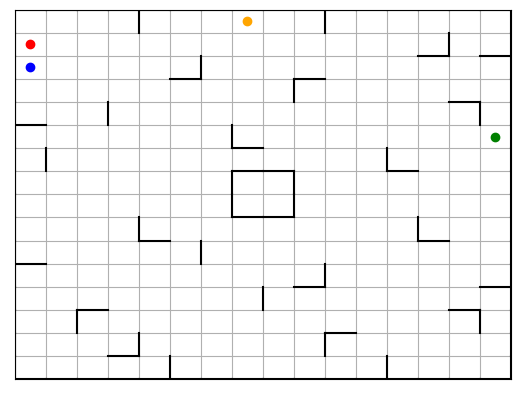

In [3]:
%matplotlib inline

def test_moving_robot(robot: RobotColors, direction: Directions, start_coord: Coord, end_coord: Coord, plot=False):
    assert board.get_robot(robot).get_coord() == start_coord, f"expected starting coord {start_coord} but got {board.get_robot(robot).get_coord()} instead"
    board.move(robot, direction, plot)
    assert board.get_robot(robot).get_coord() == end_coord, f"expected ending coord {end_coord} but got {board.get_robot(robot).get_coord()} instead"

board = Board()
board.plot()

test_moving_robot(RobotColors.GREEN, Directions.LEFT, Coord(12, 10), Coord(7, 10), True)
test_moving_robot(RobotColors.YELLOW, Directions.DOWN, Coord(7, 11), Coord(7, 11), True)
test_moving_robot(RobotColors.BLUE, Directions.LEFT, Coord(1, 13), Coord(0, 13), True)
test_moving_robot(RobotColors.RED, Directions.UP, Coord(0, 15), Coord(0, 15), True)
test_moving_robot(RobotColors.RED, Directions.DOWN, Coord(0, 15), Coord(0, 14), True)
test_moving_robot(RobotColors.YELLOW, Directions.UP, Coord(7, 11), Coord(7, 15), True)
test_moving_robot(RobotColors.GREEN, Directions.RIGHT, Coord(7, 10), Coord(15, 10), True)